In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mkl

mkl.set_num_threads(4)
np.random.seed(1234)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [16, 9]

In [2]:
# arrange 2D matrices as tiles (takes 4D `examples` tensor with dims: rows x cols x tile_height x tile_width)
def tiles(examples):
    rows_count = examples.shape[0]
    cols_count = examples.shape[1]
    tile_height = examples.shape[2]
    tile_width = examples.shape[3]
    
    space_between_tiles = 2
    img_matrix = np.empty(shape=(rows_count*(tile_height+space_between_tiles), cols_count*(tile_width+space_between_tiles)))
    img_matrix.fill(np.nan)
    
    for i in range(rows_count):
        for j in range(cols_count):
            i_min = i*(tile_height+space_between_tiles)
            i_max = i_min+tile_height
            j_min = j*(tile_height+space_between_tiles)
            j_max = j_min+tile_height
            img_matrix[i_min:i_max,j_min:j_max] = examples[i, j]
    
    return img_matrix

## MNIST Dataset

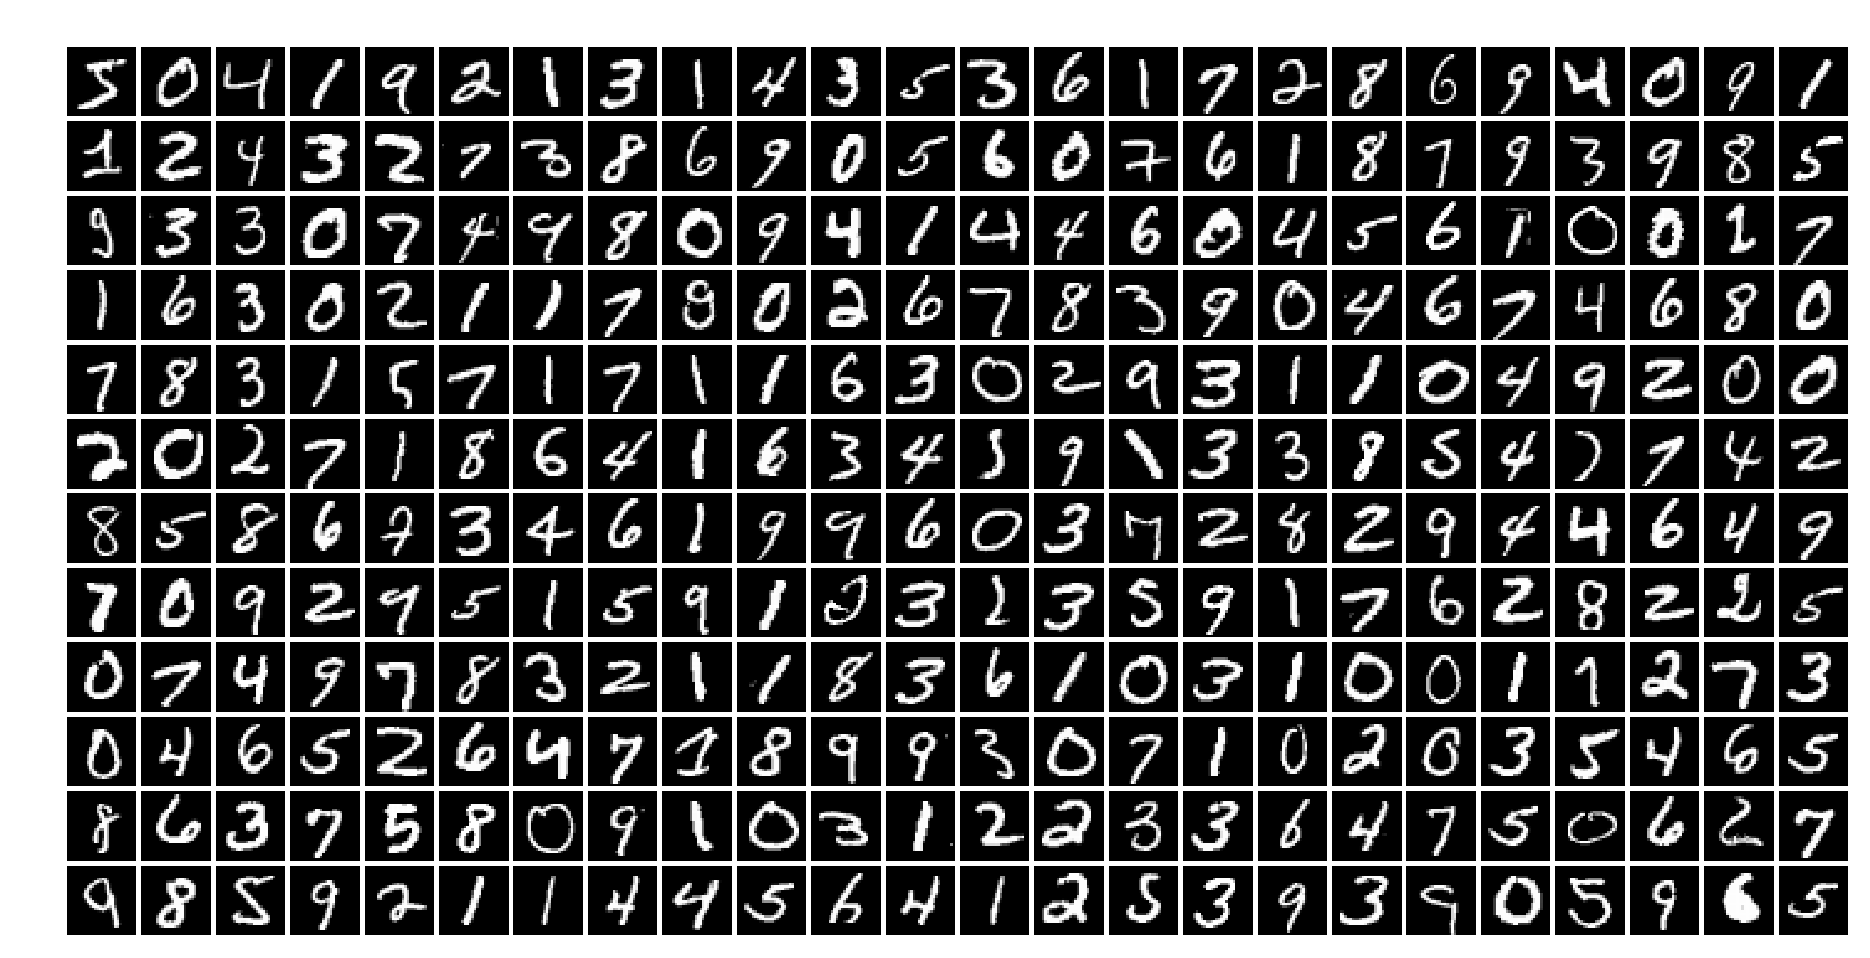

In [3]:
import mnist
digits = np.reshape(mnist.train_images()[:12*24], newshape=(12, 24, 28, 28))
img = tiles(digits)

plt.matshow(img, cmap='gray', interpolation='none')
plt.axis('off')
plt.show()

In [4]:
X = mnist.train_images().astype(np.float32) / 255.0
y = mnist.train_labels()
X.shape

(60000, 28, 28)

Reshape `X` so that the last two dimensions are collapsed into single dimension.

In [6]:
X = X.reshape((X.shape[0], -1))

In [7]:
X.shape

(60000, 784)

## Visualizing the distribution of MNIST digits

Add a scatter plot to `plot`, which:
* displys the first two dimensions of `X`,
* includes only these elements from `X` for which `y == i` (i.e. elements from the i-th class),
* includes label (i.e. `i`) in the legend.


In [56]:
def plot_2d_mnist_scatter(X, y):
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    plt.prism()

    for i in range(10):
        digit_indeces = np.where(y == i)
        dim1 = X[digit_indeces, 0]
        dim2 = X[digit_indeces, 1]
        plot.scatter(dim1, dim2, label=str(i))

    plot.set_xticks(())
    plot.set_yticks(())

    plt.tight_layout()
    plt.legend()
    plt.show()

### Principal Component Analysis (PCA)

In [44]:
SAMPLES_LIMIT = 2000
X_small = X[:SAMPLES_LIMIT]
y_small = y[:SAMPLES_LIMIT]

Use PCA function to embed `X_small` in two dimensions. Store the result in `X_pca_embedded`.

In [40]:
from sklearn.decomposition import PCA

pca = PCA(2)
pca = pca.fit(X_small)
X_pca_embedded = pca.transform(X_small)

In [41]:
X_pca_embedded.shape

(2000, 2)

In [42]:
pca.explained_variance_ratio_

array([ 0.10009538,  0.07460614], dtype=float32)

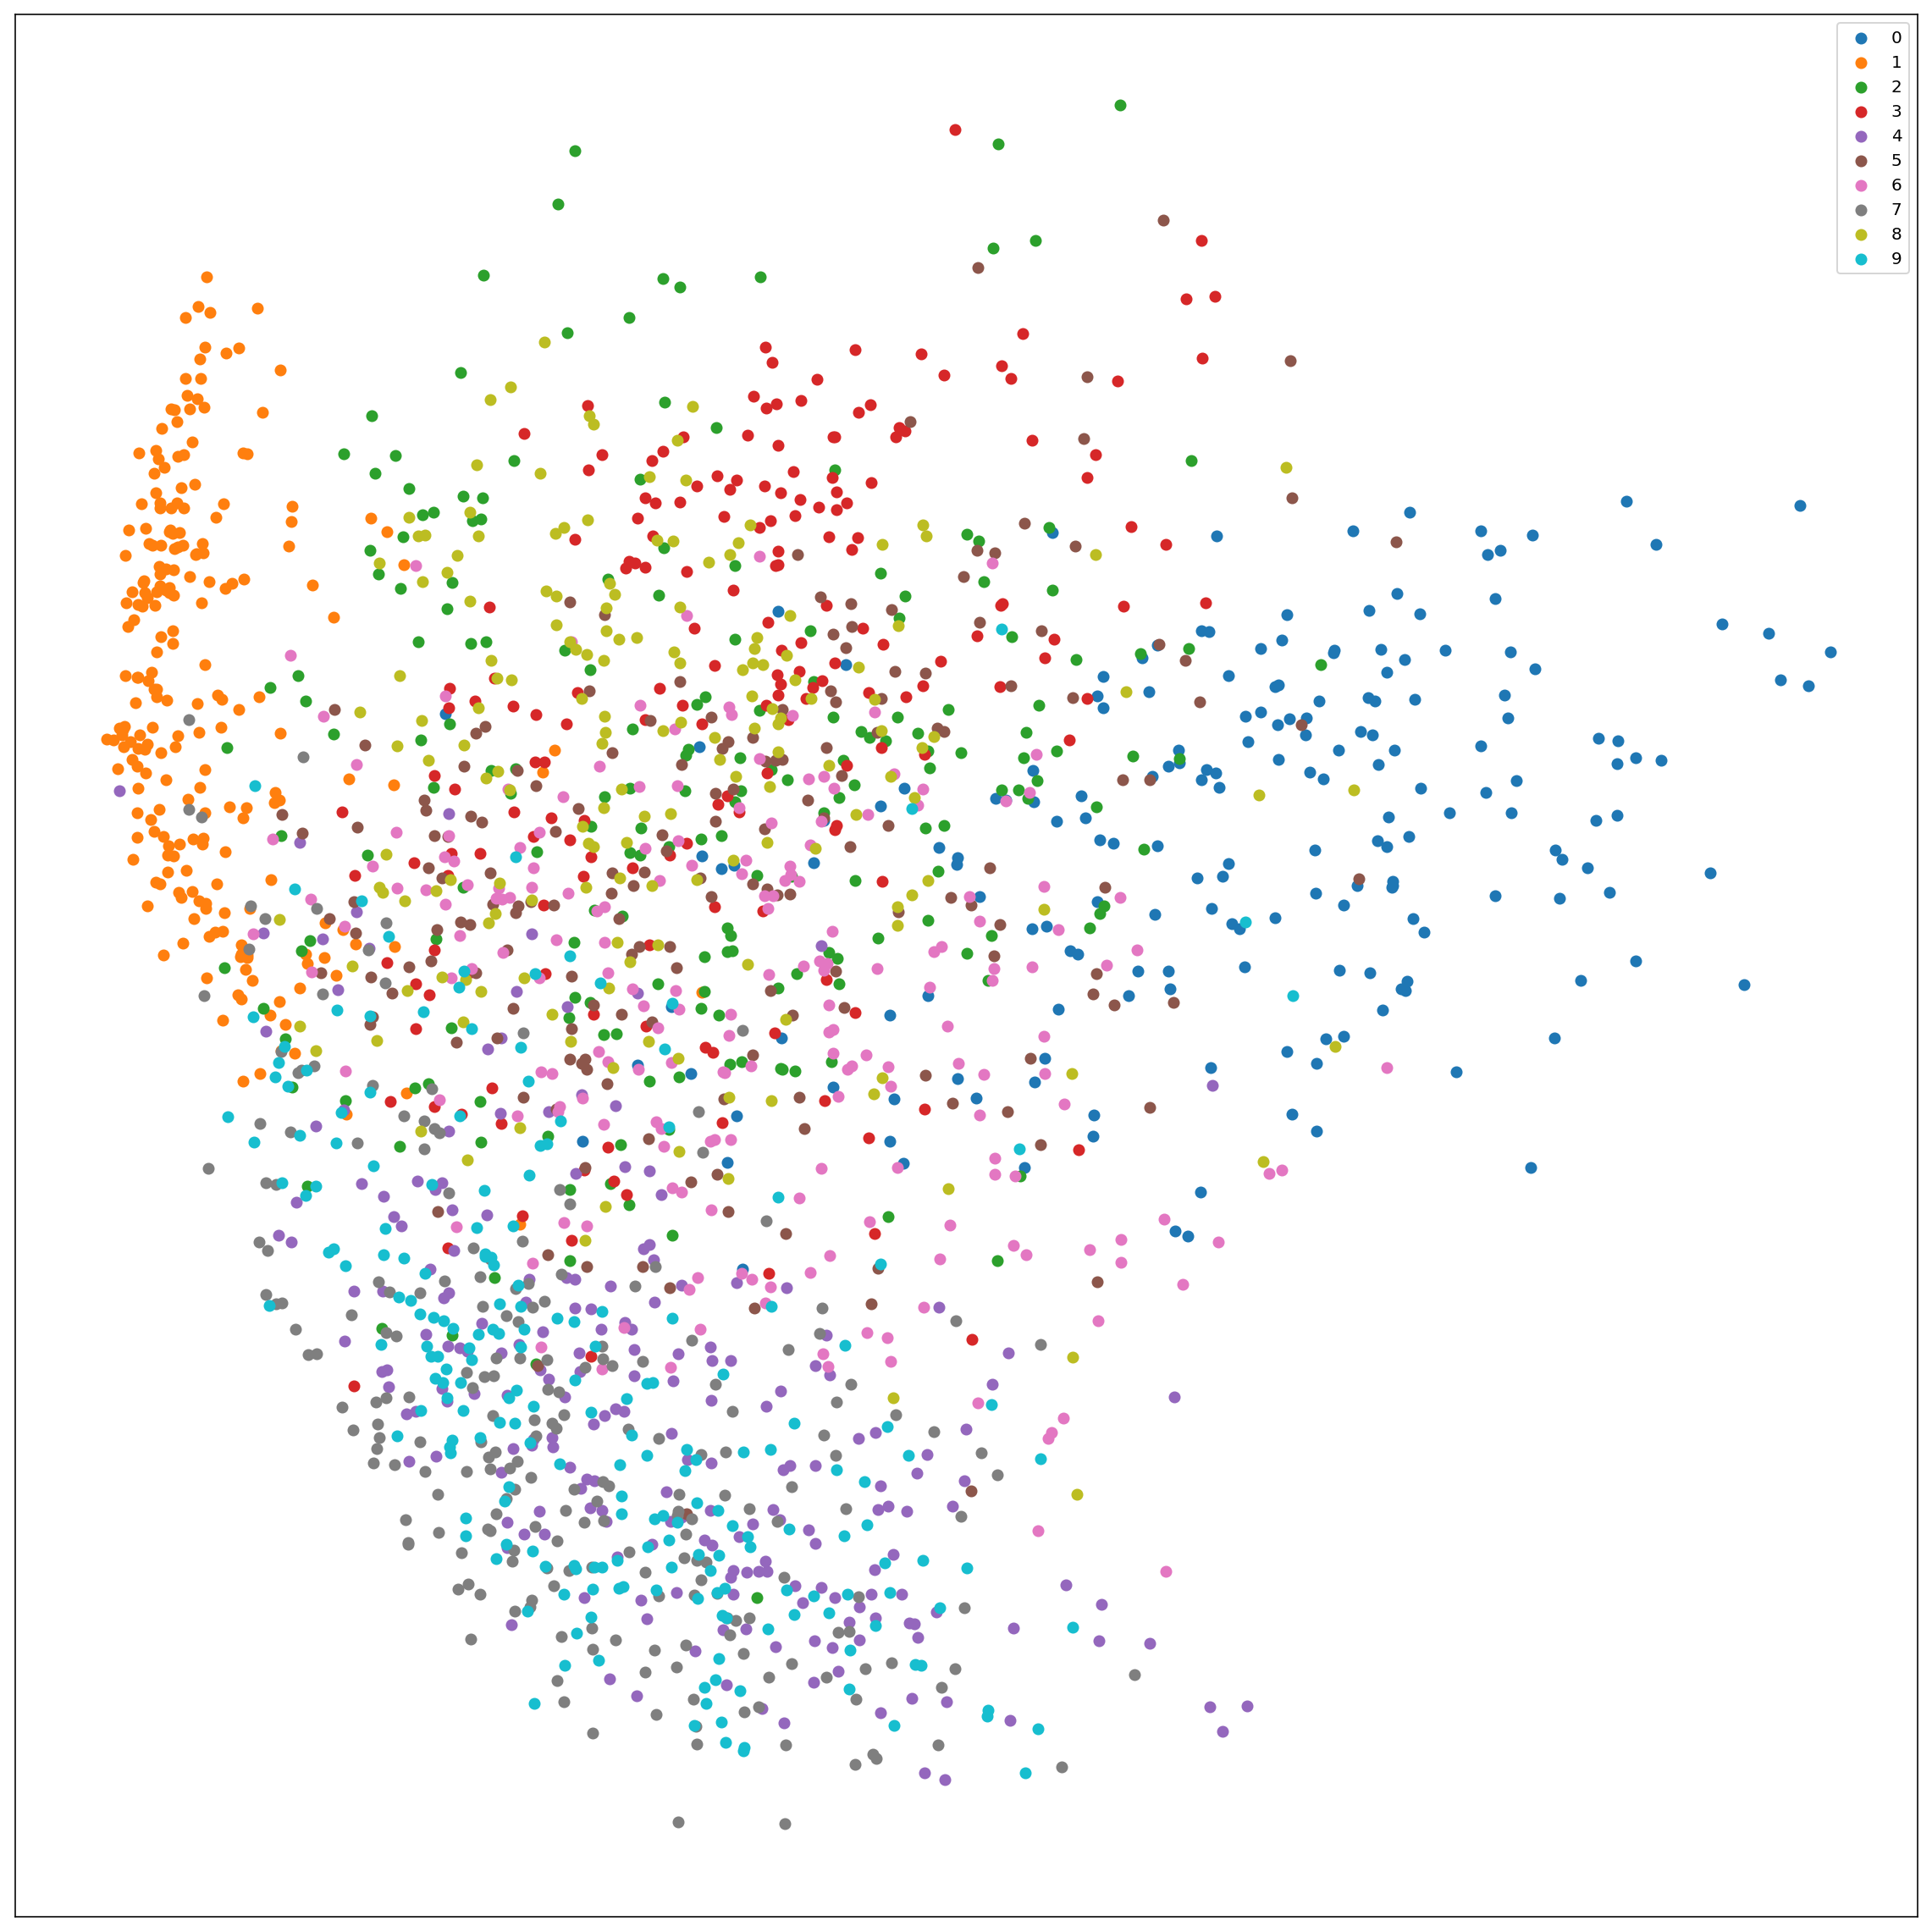

In [57]:
plot_2d_mnist_scatter(X_pca_embedded, y_small)

### T-distributed Stochastic Neighbour Embedding (T-SNE)

Make sure to have a look on this increadible [article on T-SNE](https://distill.pub/2016/misread-tsne/).

Use `T-SNE` function to embed `X_small` in two dimensions. Store the result in `X_tsne_embedded`. <BR>
Use:
 * `n_iter=500` argument to limit the number of T-SNE iterations, 
 * `verbose=2` argument to see a verbose output during embedding.

In [55]:
from sklearn.manifold import TSNE

tsne = TSNE(2, verbose=2, n_iter=500)
X_tsne_embedded = tsne.fit_transform(X_small)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.194s...
[t-SNE] Computed neighbors for 2000 samples in 17.818s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 2.528206
[t-SNE] Computed conditional probabilities in 0.208s
[t-SNE] Iteration 50: error = 78.0270691, gradient norm = 0.0115661 (50 iterations in 3.634s)
[t-SNE] Iteration 100: error = 75.9672165, gradient norm = 0.0194332 (50 iterations in 3.434s)
[t-SNE] Iteration 150: error = 75.6778183, gradient norm = 0.0007904 (50 iterations in 2.829s)
[t-SNE] Iteration 200: error = 75.6748505, gradient norm = 0.0071889 (50 iterations in 2.948s)
[t-SNE] Iteration 250: error = 75.6571350, gradient norm = 0.0027717 (50 iterations in 3.167s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.657135
[t-SNE] Iteration 300: error = 1.4844328, gradient norm = 0.0010154 (50 iterations in 2.860s

In [15]:
X_tsne_embedded.shape

(2000, 2)

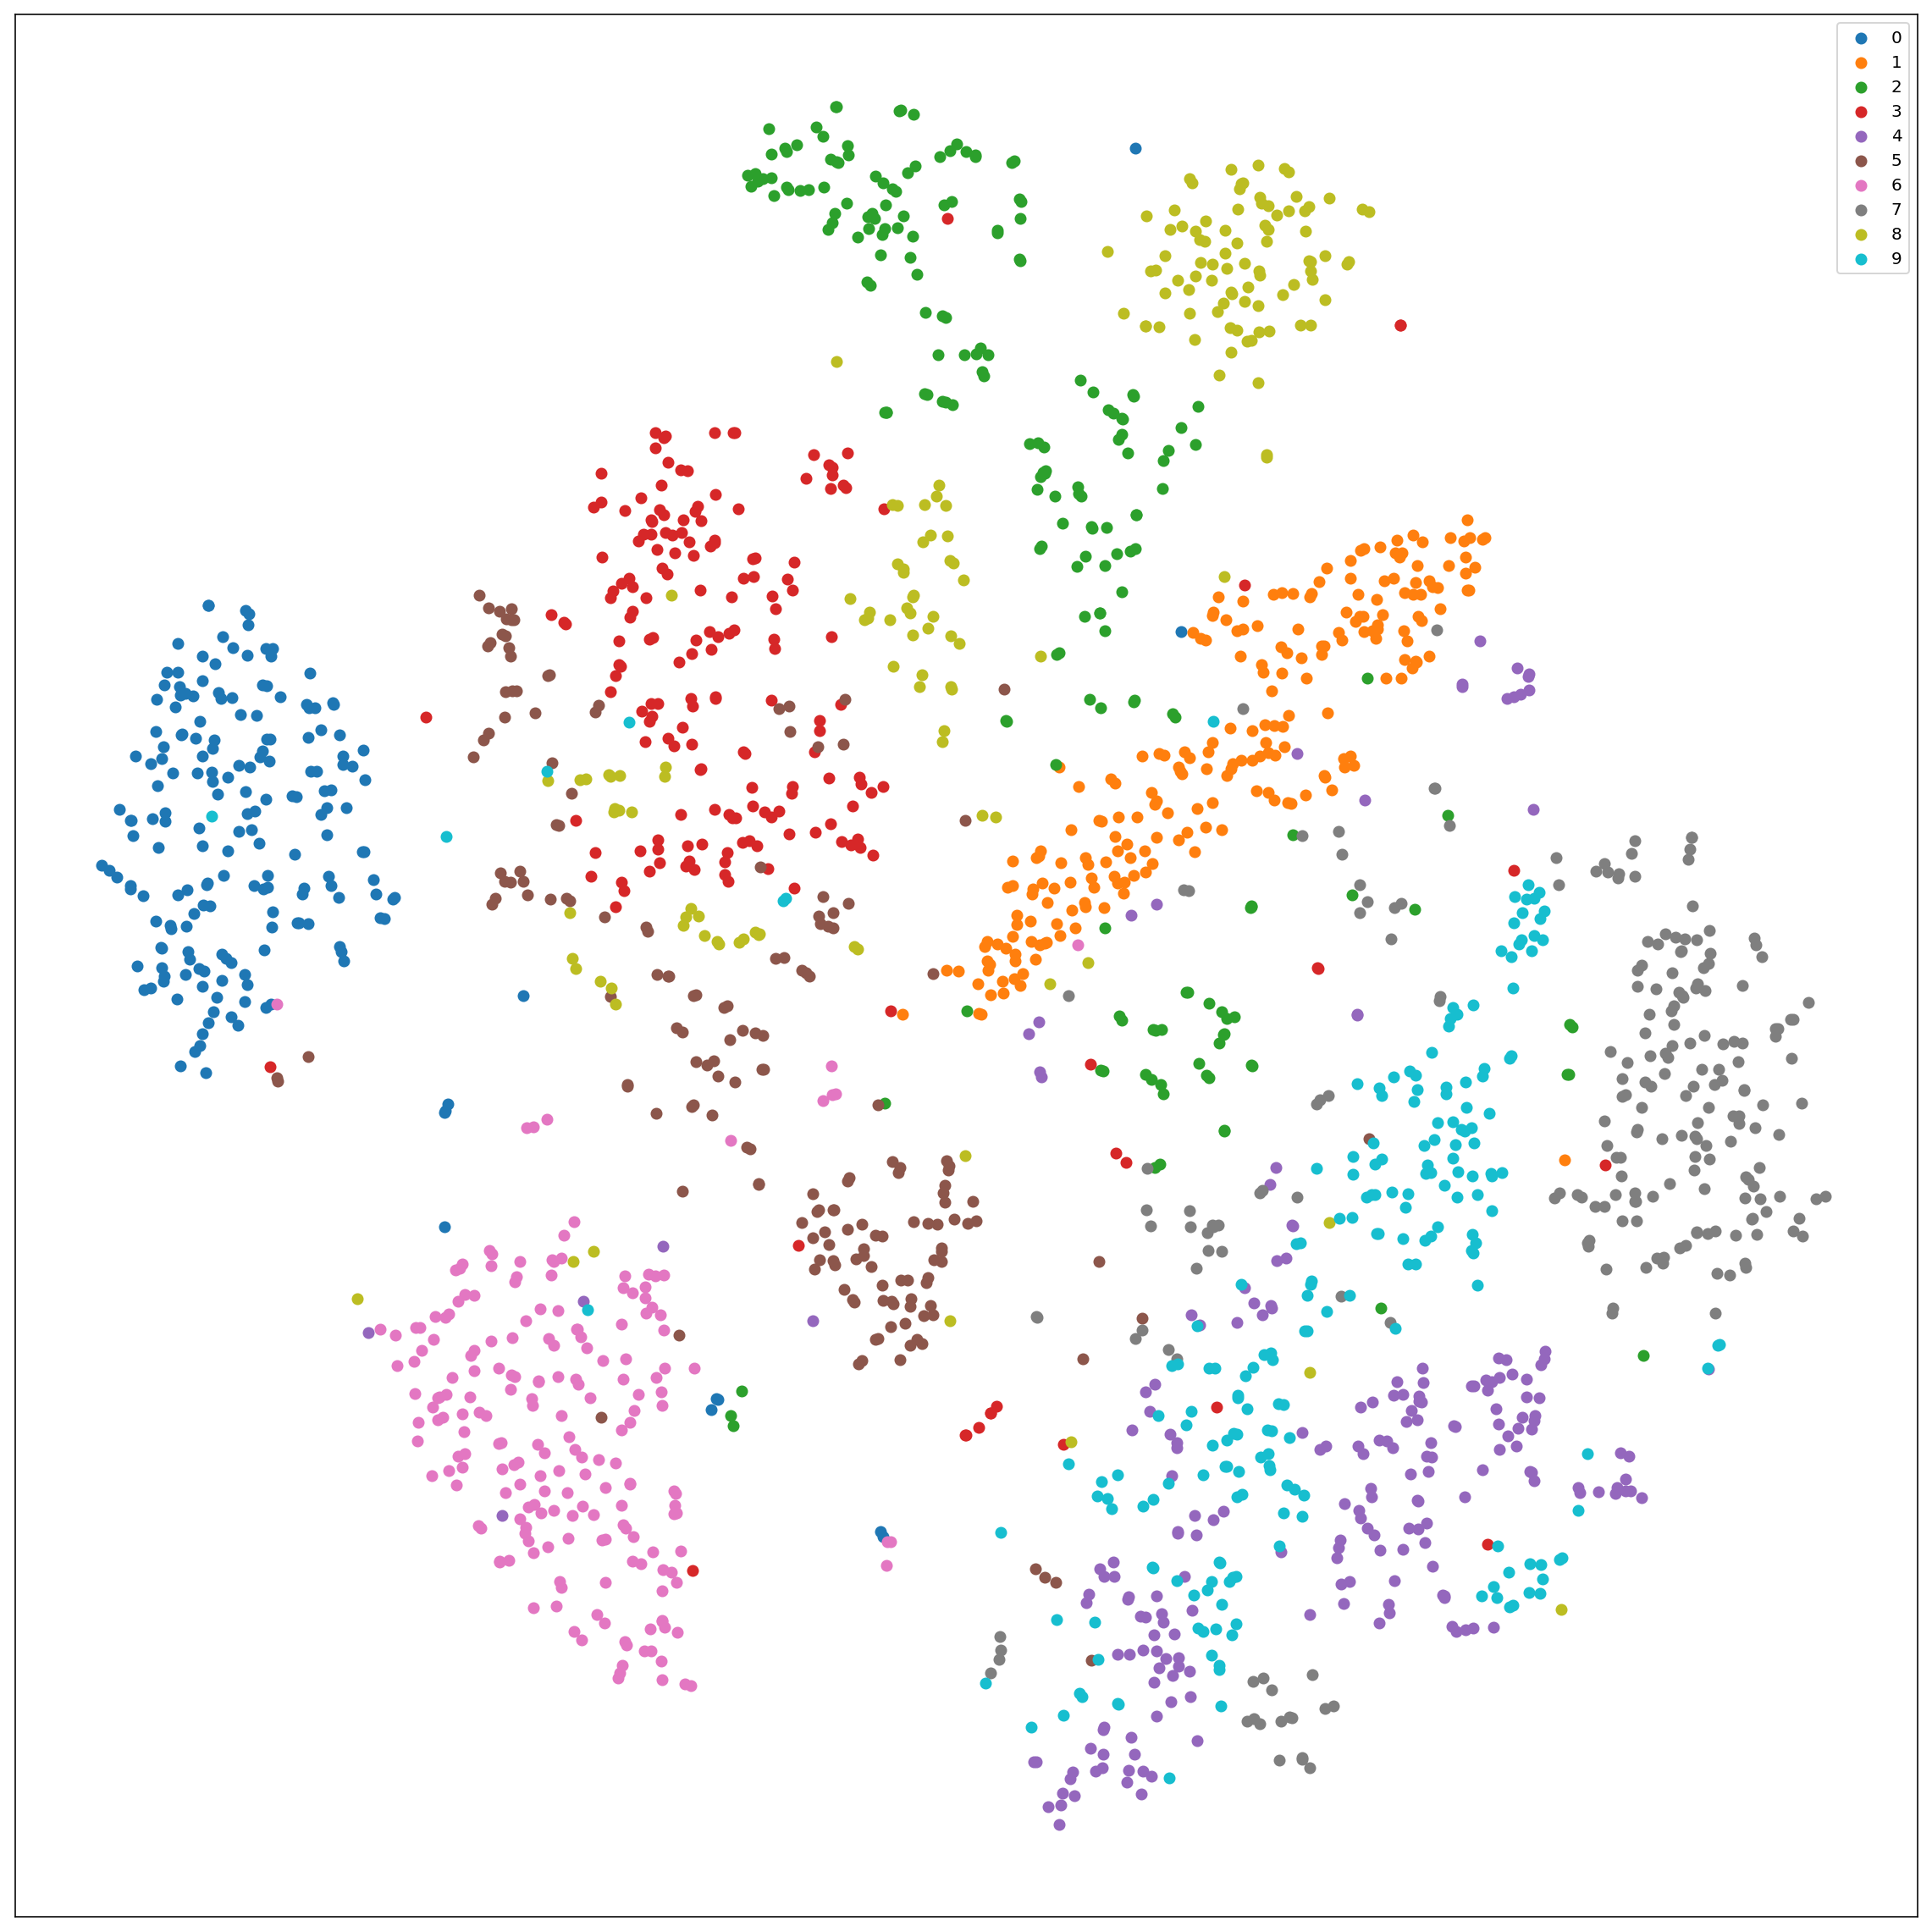

In [58]:
plot_2d_mnist_scatter(X_tsne_embedded, y_small)

### 3D interactive plots with plotly

In [17]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

def plot_3d_mnist_plotly_scatter(X, y):
    def make_trace(i):
        digit_indeces = y == i
        return go.Scatter3d(
            x=X[digit_indeces, 0],
            y=X[digit_indeces, 1],
            z=X[digit_indeces, 2],
            mode='markers',
            name=str(i),
            marker=dict(
                color=i,
                colorscale='Jet',
                size=4,
                symbol='circle',
                line=dict(
                    color='rgb(204, 204, 204)',
                    width=1
                )
            )
        )
        
    traces = [make_trace(i) for i in range(10)]
    
    layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)

Use PCA function to embed `X_small` in **three** dimensions. Store the result in `X_3d_pca_embedded`.

In [18]:
pca_3d = PCA(3)
X_3d_pca_embedded = pca_3d.fit_transform(X_small)

In [19]:
X_3d_pca_embedded.shape

(2000, 3)

In [20]:
plot_3d_mnist_plotly_scatter(X_3d_pca_embedded, y_small)

## Classification task

In [47]:
from sklearn.model_selection import train_test_split
SAMPLES_LIMIT=10000
X_train, X_test, y_train, y_test = train_test_split(X[:SAMPLES_LIMIT], y[:SAMPLES_LIMIT], test_size=0.2)

In [48]:
from sklearn import svm
classifier = svm.SVC(C=1, gamma=0.001)
classifier.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
from sklearn import metrics

predicted = classifier.predict(X_test)

print("Classification report for classifier {}:\n{}\n".format(
    classifier, metrics.classification_report(y_test, predicted)))

Classification report for classifier SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.98      0.96      0.97       200
          1       0.90      0.98      0.94       219
          2       0.93      0.88      0.90       202
          3       0.92      0.88      0.90       217
          4       0.91      0.90      0.90       174
          5       0.86      0.88      0.87       177
          6       0.92      0.96      0.94       216
          7       0.94      0.93      0.94       219
          8       0.92      0.85      0.88       193
          9       0.86      0.91      0.89       183

avg / total       0.92      0.92      0.91      2000




Calculate and display the confision matrix for `predicted` and `y_test` (use metrics package).

In [54]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

print("Confusion matrix:\n{}".format(confusion_matrix))

Confusion matrix:
[[193   0   0   2   0   0   1   1   3   0]
 [  0 214   1   1   0   3   0   0   0   0]
 [  0   6 178   0   3   2   6   2   4   1]
 [  0   4   4 191   1   8   1   2   4   2]
 [  0   1   0   0 156   0   3   1   0  13]
 [  1   4   1   8   0 156   4   0   3   0]
 [  2   0   1   1   2   3 207   0   0   0]
 [  0   5   2   0   3   0   0 204   0   5]
 [  1   4   5   2   0   8   2   1 164   6]
 [  0   0   0   3   7   1   0   5   0 167]]
